## Plotting a date file

In [53]:
import pandas, datetime, numpy
from matplotlib import pyplot as plt

In [54]:
% matplotlib inline

### Read the data

In [55]:
def read_dates(infile):
    """Read a file of dates (one per line) and write to a list."""

    fin = open(infile, 'r')
    date_list = []
    for line in fin:
        date_list.append(line.rstrip('\n'))
    fin.close()

    return date_list

In [56]:
date_list = read_dates('dates_pwigt90pct_ERAInterim_500hPa_030day-runmean_native.txt')
print date_list[0:5]

['1979-03-18', '1979-03-19', '1979-03-20', '1979-03-21', '1979-03-22']


In [57]:
ones = numpy.ones(len(date_list))
dates_df = pandas.DataFrame(ones, index=map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'), date_list), columns=['count'])

In [58]:
print dates_df

            count
1979-03-18      1
1979-03-19      1
1979-03-20      1
1979-03-21      1
1979-03-22      1
1979-03-23      1
1979-03-24      1
1979-03-25      1
1979-03-26      1
1979-03-27      1
1979-03-28      1
1979-03-31      1
1979-04-03      1
1979-05-27      1
1979-05-28      1
1979-05-29      1
1979-06-18      1
1979-06-19      1
1979-07-23      1
1979-07-24      1
1979-07-25      1
1979-07-26      1
1979-07-27      1
1979-09-05      1
1979-09-06      1
1979-09-07      1
1980-02-02      1
1980-02-03      1
1980-02-04      1
1980-02-05      1
...           ...
2014-05-02      1
2014-05-03      1
2014-05-04      1
2014-08-18      1
2014-08-19      1
2014-08-20      1
2014-08-21      1
2014-08-22      1
2014-08-23      1
2014-08-24      1
2014-08-25      1
2014-08-26      1
2014-08-27      1
2014-08-28      1
2014-08-29      1
2014-08-30      1
2014-08-31      1
2014-09-01      1
2014-09-02      1
2014-09-03      1
2014-09-04      1
2014-09-05      1
2014-09-06      1
2014-09-07

### Filter and fill to desired date range

In [59]:
start = '1979-12-01'
end = '2014-11-30'

datetime_start = datetime.datetime.strptime(start, '%Y-%m-%d')
start_selection = dates_df.index >= datetime_start

datetime_end = datetime.datetime.strptime(end, '%Y-%m-%d')
end_selection = dates_df.index <= datetime_end

combined_selection = start_selection & end_selection

In [60]:
print combined_selection[0:30]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True]


In [61]:
print combined_selection[-30:-1]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [62]:
filtered_dates_df = dates_df[combined_selection]

In [63]:
date_range = pandas.date_range(start, end)
filled_filtered_dates_df = filtered_dates_df.reindex(date_range, fill_value=0)

In [64]:
print filled_filtered_dates_df

            count
1979-12-01      0
1979-12-02      0
1979-12-03      0
1979-12-04      0
1979-12-05      0
1979-12-06      0
1979-12-07      0
1979-12-08      0
1979-12-09      0
1979-12-10      0
1979-12-11      0
1979-12-12      0
1979-12-13      0
1979-12-14      0
1979-12-15      0
1979-12-16      0
1979-12-17      0
1979-12-18      0
1979-12-19      0
1979-12-20      0
1979-12-21      0
1979-12-22      0
1979-12-23      0
1979-12-24      0
1979-12-25      0
1979-12-26      0
1979-12-27      0
1979-12-28      0
1979-12-29      0
1979-12-30      0
...           ...
2014-11-01      0
2014-11-02      0
2014-11-03      0
2014-11-04      0
2014-11-05      0
2014-11-06      0
2014-11-07      0
2014-11-08      0
2014-11-09      0
2014-11-10      0
2014-11-11      0
2014-11-12      0
2014-11-13      0
2014-11-14      0
2014-11-15      0
2014-11-16      0
2014-11-17      0
2014-11-18      0
2014-11-19      0
2014-11-20      0
2014-11-21      0
2014-11-22      0
2014-11-23      0
2014-11-24

## Seasonal plot

### Aggregate to seasonal timescale

[This](http://stackoverflow.com/questions/14569223/timegrouper-pandas) is a good example of the pandas TimeGrouper

In [65]:
filled_filtered_dates_df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[1979-12-01, ..., 2014-11-30]
Length: 12784, Freq: D, Timezone: None

In [66]:
from pandas.tseries.resample import TimeGrouper

seasonal_data = filled_filtered_dates_df.groupby(TimeGrouper(freq='3M', closed='left')).sum()
seasonal_data = seasonal_data.drop(seasonal_data.index[-1])
print seasonal_data

            count
1980-02-29     24
1980-05-31     54
1980-08-31     33
1980-11-30      0
1981-02-28      0
1981-05-31     20
1981-08-31     38
1981-11-30      0
1982-02-28      0
1982-05-31     12
1982-08-31     26
1982-11-30      0
1983-02-28      4
1983-05-31      5
1983-08-31      0
1983-11-30      0
1984-02-29      0
1984-05-31     20
1984-08-31      7
1984-11-30     16
1985-02-28      0
1985-05-31      0
1985-08-31      3
1985-11-30     17
1986-02-28      0
1986-05-31      3
1986-08-31     17
1986-11-30     16
1987-02-28      0
1987-05-31      2
...           ...
2007-08-31     40
2007-11-30      0
2008-02-29      0
2008-05-31      3
2008-08-31      8
2008-11-30     24
2009-02-28      0
2009-05-31     12
2009-08-31     33
2009-11-30      8
2010-02-28      9
2010-05-31      0
2010-08-31      3
2010-11-30     23
2011-02-28      9
2011-05-31      6
2011-08-31     35
2011-11-30      0
2012-02-29      0
2012-05-31      9
2012-08-31      8
2012-11-30      0
2013-02-28      0
2013-05-31

In [82]:
assert len(seasonal_data['count']) % 4.0 == 0, "Date range must ensure each season is equally represented"

season_keys = {2: 'DJF', 5: 'MAM', 8: 'JJA', 11: 'SON'}
season_counts = {}
for i in range(0,4):
    month = seasonal_data.index[i].month
    assert month in season_keys.keys(), "Set start and end date as the beginning/end month of DJF, MAM, JJA or SON"
    season_counts[season_keys[month]] = seasonal_data['count'][i::4]

There's a good stackplot example [here](http://matplotlib.org/examples/pylab_examples/stackplot_demo.html) and an alternative histogram stacking method [here](http://matplotlib.org/examples/pylab_examples/bar_stacked.html).

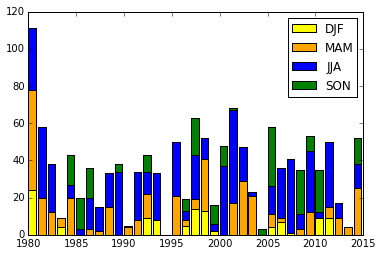

In [83]:
start_year = season_counts['MAM'].index[0].year
end_year = season_counts['MAM'].index[-1].year

x = numpy.arange(start_year, end_year + 1)

pdjf = plt.bar(x, season_counts['DJF'], color='yellow')
pmam = plt.bar(x, season_counts['MAM'], color='orange', bottom=season_counts['DJF'])
pjja = plt.bar(x, season_counts['JJA'], color='blue', bottom=season_counts['DJF'].as_matrix()+season_counts['MAM'].as_matrix())
pson = plt.bar(x, season_counts['SON'], color='green', bottom=season_counts['DJF'].as_matrix()+season_counts['MAM'].as_matrix()+season_counts['JJA'].as_matrix())

plt.legend( (pdjf[0], pmam[0], pjja[0], pson[0]), ('DJF', 'MAM', 'JJA', 'SON') )

plt.show()

In [72]:
for i in range(0, 34):
    print i+1980, season_counts['DJF'][i], season_counts['MAM'][i], season_counts['JJA'][i], season_counts['SON'][i]

1980 24.0 54.0 33.0 0.0
1981 0.0 20.0 38.0 0.0
1982 0.0 12.0 26.0 0.0
1983 4.0 5.0 0.0 0.0
1984 0.0 20.0 7.0 16.0
1985 0.0 0.0 3.0 17.0
1986 0.0 3.0 17.0 16.0
1987 0.0 2.0 13.0 0.0
1988 0.0 15.0 18.0 0.0
1989 0.0 0.0 34.0 4.0
1990 0.0 4.0 1.0 0.0
1991 0.0 8.0 26.0 0.0
1992 9.0 13.0 12.0 9.0
1993 8.0 0.0 25.0 0.0
1994 0.0 0.0 0.0 0.0
1995 0.0 21.0 29.0 0.0
1996 5.0 3.0 5.0 6.0
1997 14.0 5.0 24.0 20.0
1998 13.0 28.0 11.0 0.0
1999 2.0 0.0 4.0 10.0
2000 0.0 0.0 37.0 11.0
2001 0.0 17.0 50.0 1.0
2002 0.0 29.0 18.0 0.0
2003 0.0 21.0 2.0 0.0
2004 0.0 0.0 0.0 3.0
2005 4.0 7.0 15.0 32.0
2006 7.0 2.0 27.0 0.0
2007 1.0 0.0 40.0 0.0
2008 0.0 3.0 8.0 24.0
2009 0.0 12.0 33.0 8.0
2010 9.0 0.0 3.0 23.0
2011 9.0 6.0 35.0 0.0
2012 0.0 9.0 8.0 0.0
2013 0.0 4.0 0.0 0.0


In [74]:
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    print season, numpy.sum(season_counts[season])

DJF 109.0
MAM 348.0
JJA 615.0
SON 214.0


## Monthly plot

### Aggregate to the monthly timescale

In [85]:
monthly_data = filled_filtered_dates_df.groupby(TimeGrouper(freq='1M', closed='left')).sum()
monthly_data = monthly_data.drop(monthly_data.index[-1])
print monthly_data

            count
1979-12-31      0
1980-01-31      0
1980-02-29     24
1980-03-31      6
1980-04-30     24
1980-05-31     24
1980-06-30      0
1980-07-31     23
1980-08-31     10
1980-09-30      0
1980-10-31      0
1980-11-30      0
1980-12-31      0
1981-01-31      0
1981-02-28      0
1981-03-31     15
1981-04-30      0
1981-05-31      5
1981-06-30     17
1981-07-31     18
1981-08-31      3
1981-09-30      0
1981-10-31      0
1981-11-30      0
1981-12-31      0
1982-01-31      0
1982-02-28      0
1982-03-31      0
1982-04-30      5
1982-05-31      7
...           ...
2012-06-30      0
2012-07-31      0
2012-08-31      8
2012-09-30      0
2012-10-31      0
2012-11-30      0
2012-12-31      0
2013-01-31      0
2013-02-28      0
2013-03-31      4
2013-04-30      0
2013-05-31      0
2013-06-30      0
2013-07-31      0
2013-08-31      0
2013-09-30      0
2013-10-31      0
2013-11-30      0
2013-12-31      0
2014-01-31      0
2014-02-28      0
2014-03-31      3
2014-04-30     17
2014-05-31

In [89]:
# Write a function that will be used to group the data
def get_month(x):
    return x.month

# Call the function with the groupby operation. 
grouped_data = monthly_data.groupby(get_month)
monthly_totals = grouped_data.sum()
print monthly_totals

    count
1      14
2      77
3      46
4     127
5     175
6     157
7     253
8     205
9     123
10     34
11     57
12     18
